# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
plt.rcParams['figure.figsize'] = [15, 5]

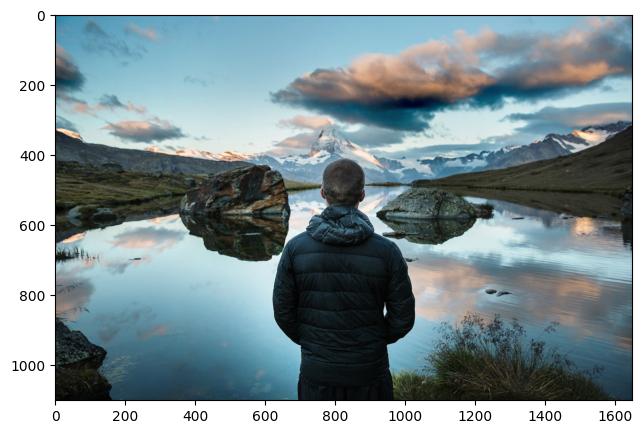

In [8]:
img = cv2.imread('D:/AI_learning/images/natures.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: title={'center': 'White patch'}>,
 Text(0.5, 1.0, 'White patch'))

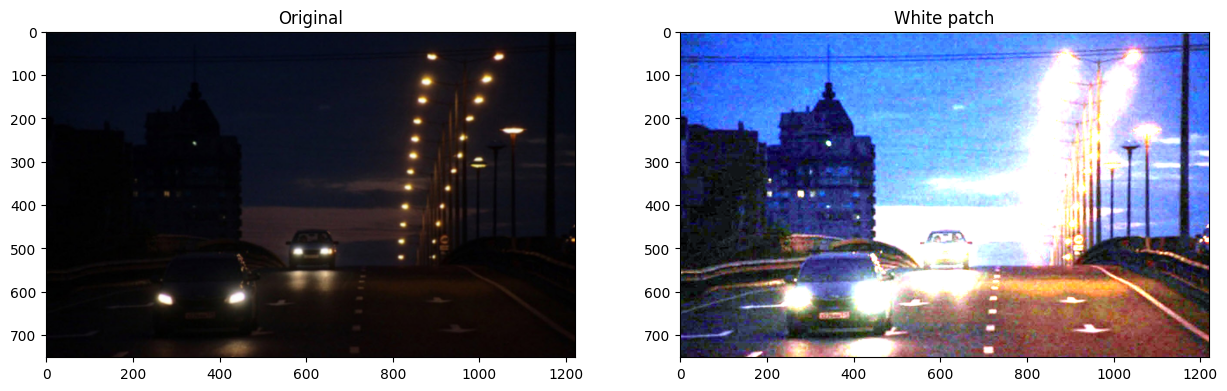

In [4]:
# Define white patch and the coefficients
row, col = 712, 413 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('White patch')

### Gray world
This algorithm assumes that a scene, on average, is gray.

kr: 1.25208829282947
kg: 1.0450902928443053
kb: 1.0


(<Axes: title={'center': 'Gray world'}>,
 Text(0.5, 1.0, 'Gray world'))

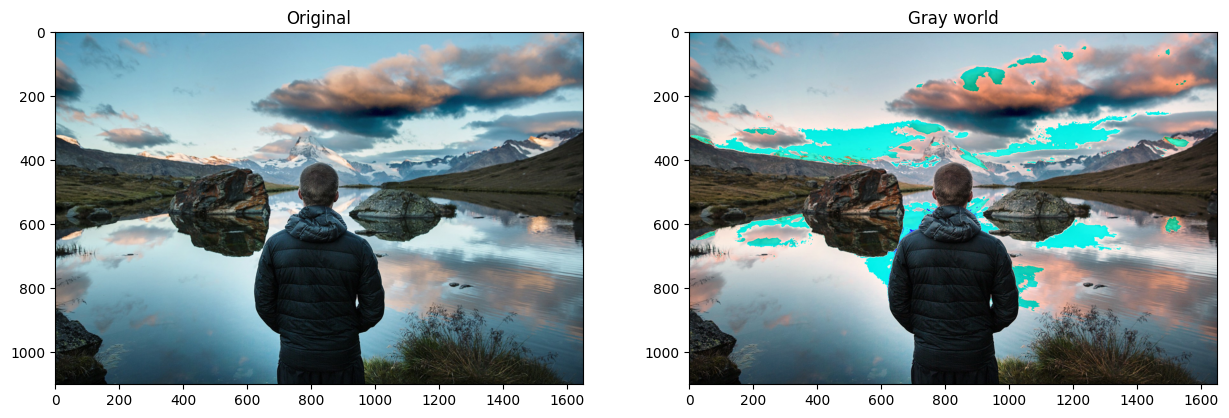

In [2]:
# Load your image
img = cv2.imread('D:/AI_learning/images/natures.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
max_mean = max(mean_r, mean_g, mean_b)
kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b

print("kr:", kr)
print("kg:", kg)
print("kb:", kb)

# Apply color balancing and generate the balanced image
balanced = img.copy()
balanced[:, :, 0] = balanced[:, :, 0] * kr
balanced[:, :, 1] = balanced[:, :, 1] * kg
balanced[:, :, 2] = balanced[:, :, 2] * kb
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Gray world')

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

RED: 255
GREEN: 255
BLUE: 255


(<Axes: title={'center': 'Balanced'}>,
 Text(0.5, 1.0, 'Balanced'))

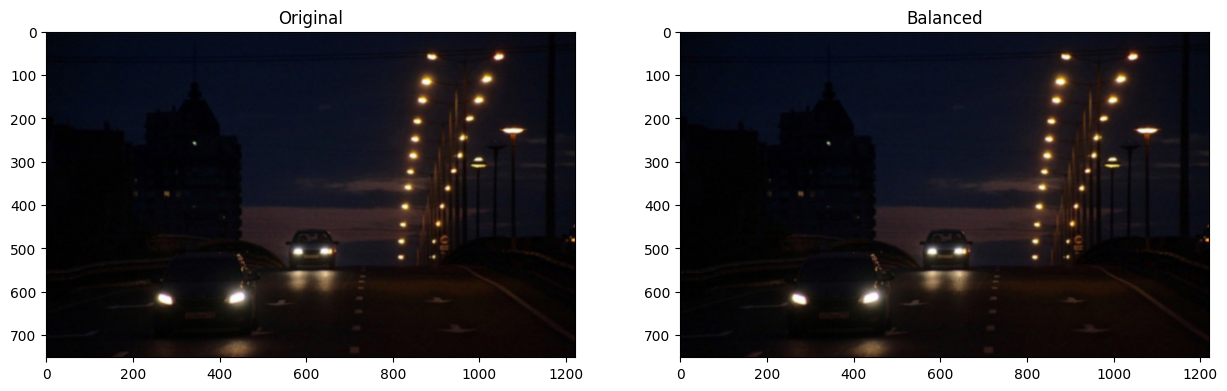

In [3]:
# Load your image
img = cv2.imread('D:/AI_learning/images/car1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

print("RED:", max_r)
print("GREEN:", max_g)
print("BLUE:", max_b)

# # Apply scale-by-max balancing and generate the balanced image
balanced = img.copy().astype(np.float32)
balanced[:, :, 0] *= 255.0 / max_r
balanced[:, :, 1] *= 255.0 / max_g
balanced[:, :, 2] *= 255.0 / max_b

balanced = np.clip(balanced, 0, 255).astype(np.uint8)


plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Balanced')